(([], []), ([], []))

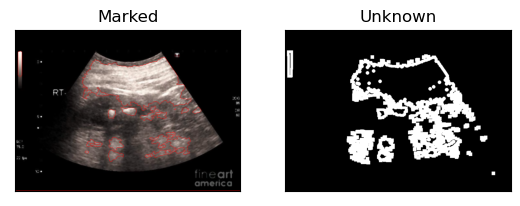

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread(r'C:\Users\User\cv projects\Kidney-Stone-Detection-main\images\image4.jpg',0)

ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.subplot(121),plt.imshow(thresh,'gray')
plt.title('Thresh_Binary_INV+cv2.Thresh_OTSU')
plt.xticks([]),plt.yticks([])

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

plt.subplot(121),plt.imshow(sure_fg,'gray')
plt.title('Sure')
plt.xticks([]),plt.yticks([])

plt.subplot(122),plt.imshow(unknown,'gray')
plt.title('Unknown')
plt.xticks([]),plt.yticks([])

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0


plt.subplot(121),plt.imshow(markers,'gray')
plt.title('Marked')
plt.xticks([]),plt.yticks([])

img = cv2.imread(r'C:\Users\User\cv projects\Kidney-Stone-Detection-main\images\image4.jpg',1)
img = cv2.medianBlur(img,5)
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.imshow(img,'gray')
plt.title('Marked')
plt.xticks([]),plt.yticks([])